## Desafio guiado S4 - Árboles de regresión

### Ejercicio 1: Preparación del ambiente de trabajo

* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios
de inmuebles, medidos con la variable Sale_Price.

In [30]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# preproceso

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#modelo
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
#indicadores
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

In [3]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [4]:
df

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,None,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,None,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2927,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,4,2006,WD,Normal,170000,-93.600190,41.990921


In [5]:
df.shape

(2930, 81)

In [6]:
df.columns

Index(['MS_SubClass', 'MS_Zoning', 'Lot_Frontage', 'Lot_Area', 'Street',
       'Alley', 'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config',
       'Land_Slope', 'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Mas_Vnr_Type', 'Mas_Vnr_Area', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_SF_1', 'BsmtFin_Type_2', 'BsmtFin_SF_2',
       'Bsmt_Unf_SF', 'Total_Bsmt_SF', 'Heating', 'Heating_QC', 'Central_Air',
       'Electrical', 'First_Flr_SF', 'Second_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual',
       'TotRms_AbvGrd', 'Functional', 'Fireplaces', 'Fireplace_Qu',
       'Garage_Type', 'Garage_Finish', 'Garage_Cars', 'G

### Ejercicio 2: Feature engineering

* Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean'object',realice lo siguiente:
    - Genere una recodificación k-1 en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función con la opción drop_first para ello.
    - Utilizando el método pd.concat, concatene a los atributos creados en la base de datos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

* No hay datos perdidos en el dataframe

In [31]:
var_objects = []
var_prefix = []
for index, row in df.items():
    if row.dtype == 'object':
        var_objects.append(index)
        var_prefix.append(f'{index[0:2]}{index[-3:]}')
# Se guarda el diccionario de recodificacion 
dic_recod = dict(zip(var_prefix,var_objects))

In [32]:
rec_bin = pd.get_dummies(df[var_objects], prefix=var_prefix,drop_first=True)
rec_bin.sample(4)

,MSass_One_Story_1945_and_Older,MSass_One_Story_1946_and_Newer_All_Styles,MSass_One_Story_PUD_1946_and_Newer,MSass_One_Story_with_Finished_Attic_All_Ages,MSass_One_and_Half_Story_Finished_All_Ages,MSass_One_and_Half_Story_PUD_All_Ages,MSass_One_and_Half_Story_Unfinished_All_Ages,MSass_PUD_Multilevel_Split_Level_Foyer,MSass_Split_Foyer,MSass_Split_or_Multilevel,...,Saype_ConLw,Saype_New,Saype_Oth,Saype_VWD,Saype_WD,Saion_AdjLand,Saion_Alloca,Saion_Family,Saion_Normal,Saion_Partial
612,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
34,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
891,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
df_dummies = df.drop(columns=var_objects)

In [34]:
df_bin = pd.concat([df_dummies, rec_bin], axis=1).copy()

In [35]:
df_bin.shape

(2930, 307)

## Ejercicio 3: Primer modelo

* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.

In [36]:
df_bin['Sale_Price'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [37]:
y = df_bin['Sale_Price']
X = df_bin.drop(columns='Sale_Price')
df_bin.shape

(2930, 307)

* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla
pseudoaleatoria.

In [38]:
def train_split(X,y, norm=True, t_size=.33, rdn=1991):
    X_train_pre, X_test_pre, y_train, y_test = train_test_split(X,
                                        y,random_state=rdn, test_size=t_size)
    if norm:
        scaler = StandardScaler().fit(X_train_pre)
        X_train = pd.DataFrame(scaler.transform(X_train_pre), columns=X_train_pre.columns)
        X_test = pd.DataFrame(scaler.transform(X_test_pre), columns=X_test_pre.columns)
    else:
        X_train= X_train_pre
        X_test = X_test_pre
    
    print(f'''X_train {X_train.shape}
X_test {X_test.shape}
y_train {y_train.shape}
y_test {y_test.shape}''')
    return X_train, X_test, y_train, y_test

In [39]:
X_train, X_test, y_train, y_test = train_split(X, y, norm=True)

X_train (1963, 306)
X_test (967, 306)
y_train (1963,)
y_test (967,)


* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin
modificar los hiper parámetros. Reporte las principales métricas de desempeño.

In [40]:
def metricas(X_test, y_test, model):
    print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)).round(5))
    print("Test MAE:", median_absolute_error(y_test, model.predict(X_test)).round(5))
    print("Test R2:", r2_score(y_test, model.predict(X_test)).round(5))

In [41]:
dec_tree = DecisionTreeRegressor(random_state=1991).fit(X_train, y_train)
metricas(X_test, y_test, dec_tree)

Test MSE: 1437975744.65977
Test MAE: 16500.0
Test R2: 0.78443


In [56]:
y.describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: Sale_Price, dtype: float64

* R2: Nuestras variables explican en un 78,44% la varianza del vector objetivo
* MAE: Se encuentra entre la media y la mediana, bastante cerca a la mediana, por lo cual no se desvía tanto el modelo.

### Ejercicio 4: Importancia relativa

* Implemente el método plot_importance utilizado en la lectura para reportar la
importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de
Sale_Price.
* Separe estos 10 atributos en una nueva base de datos, junto con el vector objetivo.

In [43]:
def graficar_importancia(modelo, lista_col, nro_a_imprimir=10): 
    importancia = modelo.feature_importances_
    indices = np.argsort(importancia)[::-1]
    indices_10 = indices[0:nro_a_imprimir]
    names = [lista_col[i] for i in indices_10]
    plt.title("Feature importance")
    plt.barh(range(len(names)), importancia[indices_10])
    plt.yticks(range(len(names)), names, rotation=0)

    return names

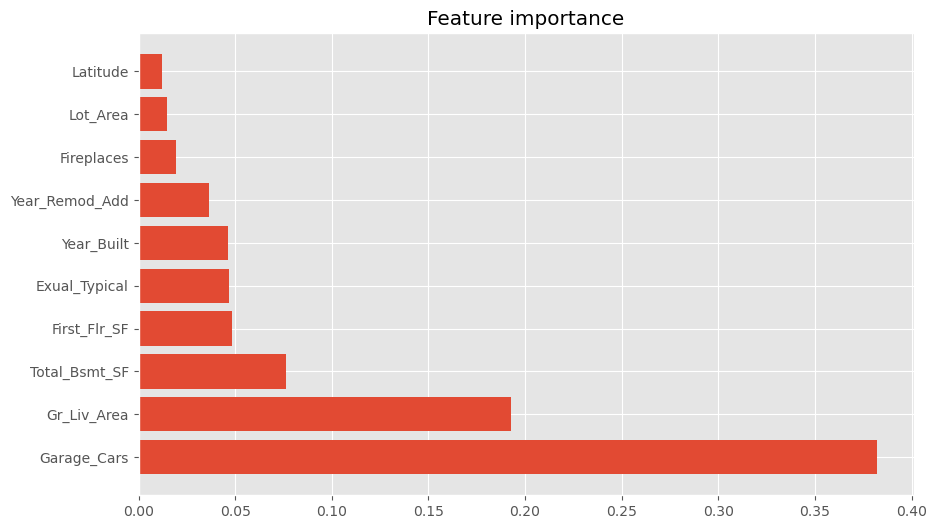

In [44]:
var_10_best = graficar_importancia(dec_tree, X.columns)

* Garage_Cars y Gr_Liv_Area son las variables mas importantes, las 8 que los siguen bajan mucho su efecto dentro del modelo.

In [45]:
var_10_best

['Garage_Cars',
 'Gr_Liv_Area',
 'Total_Bsmt_SF',
 'First_Flr_SF',
 'Exual_Typical',
 'Year_Built',
 'Year_Remod_Add',
 'Fireplaces',
 'Lot_Area',
 'Latitude']

### Ejercicio 5: Refactorización del modelo y picklingpd.get_dummies

* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar
conjuntos de entrenamiento y validación.

In [46]:
X_10 = X.loc[:,var_10_best]
X_10.head()

,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,First_Flr_SF,Exual_Typical,Year_Built,Year_Remod_Add,Fireplaces,Lot_Area,Latitude
0,2,1656,1080,1656,1,1960,1960,2,31770,42.054035
1,1,896,882,896,1,1961,1961,0,11622,42.053014
2,1,1329,1329,1329,1,1958,1958,0,14267,42.052659
3,2,2110,2110,2110,0,1968,1968,2,11160,42.051245
4,2,1629,928,928,1,1997,1998,1,13830,42.060899


In [57]:
X_train, X_test, y_train, y_test = train_split(X=X_10, y=y)

X_train (1963, 10)
X_test (967, 10)
y_train (1963,)
y_test (967,)


*  Dentro de los datos de entrenamiento genere una búsqueda de grilla con GridSearchCV utilizando los siguientes hiper parámetros:
    - Máximo de atributos: Evalúe todos los posibles atributos.
    - Máximo de profundidad: Entre 1 a 32.
    - Validaciones cruzadas: 5.

In [58]:
grilla = {'max_depth': np.linspace(1, 32, 32).astype(int),
           'random_state':[1991] }
modelo_grilla = GridSearchCV(estimator=DecisionTreeRegressor(),
                            param_grid=grilla, cv=5,
                            scoring='neg_mean_absolute_error')
modelo_grilla.fit(X_train, y_train)
best_tree = modelo_grilla.best_estimator_

In [59]:
modelo_grilla.best_params_

{'max_depth': 8, 'random_state': 1991}

In [60]:
metricas(X_test,y_test, best_tree)

Test MSE: 1276694856.60852
Test MAE: 15094.44
Test R2: 0.80861


Modelo 1
* Test MSE: 1437975744.65977
* Test MAE: 16500.0
* Test R2: 0.78443

* modelo 2 menor mse mejores predicciones
* mae mas bajo las predicciones tienen menor desviacion estandar en terminos de valores absolutos
* r2 coeficiente de determinacion mas alto, explica mejor la variabilidad de los datos.

ser mejor en mse y r2 realiza mejores predicciones y explica mejor la variabilidad, el modelo 1 tiene mejor mae lo que indica que tiene menor desviacion en terminos absolutos.

* Reporte la mejor combinación de hiper parámetros y su desempeño asociado.
Compare el desempeño en la muestra de validación con el modelo por defecto

* El mejor parametro es con una profundidad de 8
* El modelo mejora , partiendo por una mayor representacion de la variabilidad a partir de las variables seleccionadas (r2)
* luego MSE bajo bastante, y MAE se vuelve mas conservador respecto a la mediana vs el modelo anterior donde nos encontrabamos sobre la mediana. 

### Pickling

In [61]:
from pickle import dump

In [62]:
matrices_train_test = [X_train, X_test, y_train, y_test]
dump(best_tree,open('diego_lizana_actividad07.sav', 'wb'))
dump(matrices_train_test,open('matrices_train_test.sav', 'wb'))